# Data Storytelling

The dataframe named cleaned.csv that was produced from the data wrangling step has been read into this notebook.  The data wrangling step involved deleting unecessary columns, replacement of missing values, replacement of characters that do not represent a field correctly, and checking for outlier values.  

In [97]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"

import warnings
warnings.filterwarnings('ignore')

import pandas as pd

df=pd.read_csv('cleaned.csv', low_memory=False)

The objective is to predict the likelihood of an H1B-LCA application denial.  This notebook will display EDA (Exploratory Data Analysis) in order to decipher what may be the reason for an application recieving a denied status. This section will mostly contain graphs that describe a field, the relationship between two fields, or a field's relationship with the application outcome.  No analysis techniques such as inferential statistics, regression, or machine learning will be used in this section.  

The audience for the results of this EDA section is any company that wishes to hire a foreign born worker.  A company should care about H1B-LCA outcomes because they do not want to spend time filing and looking for candidates that will eventually not be certified with a successful H1B LCA application.  All of the fields in this data set apply to the employer, not the employee.  Based on my analysis, the employer will be able to find workers that are more likely to be H1B-LCA certified by changing characterisitcs about the job offered to characteristics that have a high H1B-LCA certification rate.  

The data set is diplayed in the cell below with all of its columns shown.  The CASE_STATUS column describes whether the application was certified or denied.  Many applications are labeled as certified-withdrawn.  These applications were certified but the employer decided to withdraw the application because they did not wish to hire the prospective employee.  

In [98]:
pd.set_option('display.max_columns', None)
df.head()

,CASE_STATUS,CASE_SUBMITTED,VISA_CLASS,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_ADDRESS,EMPLOYER_CITY,EMPLOYER_STATE,EMPLOYER_POSTAL_CODE,EMPLOYER_COUNTRY,AGENT_REPRESENTING_EMPLOYER,AGENT_ATTORNEY_NAME,JOB_TITLE,SOC_CODE,SOC_NAME,NAICS_CODE,TOTAL_WORKERS,NEW_EMPLOYMENT,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,FULL_TIME_POSITION,PREVAILING_WAGE,PW_UNIT_OF_PAY,PW_SOURCE,PW_SOURCE_YEAR,WAGE_RATE_OF_PAY_FROM,WAGE_RATE_OF_PAY_TO,WAGE_UNIT_OF_PAY,H1B_DEPENDENT,WILLFUL_VIOLATOR,SUPPORT_H1B,LABOR_CON_AGREE,WORKSITE_CITY,WORKSITE_COUNTY,WORKSITE_STATE,WORKSITE_POSTAL_CODE,WAGE_DIFFERENCE,MAX_WAGE_INDICATOR,PREVAILING_WAGE_INDICATOR
0,CERTIFIED-WITHDRAWN,2/24/2016,H-1B,8/10/2016,8/10/2019,DISCOVER PRODUCTS INC.,2500 LAKE COOK ROAD,RIVERWOODS,IL,60015,UNITED STATES OF AMERICA,Y,NaN,ASSOCIATE DATA INTEGRATION,15-1121,COMPUTER SYSTEMS ANALYSTS,Credit Card Issuing,1,1,0,0,0,0,0,Y,59197.0,Year,OES,2015.0,65811.0,"67,320.00",Year,N,N,None,Y,RIVERWOODS,LAKE,IL,60015,6614.0,0,0
1,CERTIFIED-WITHDRAWN,3/4/2016,H-1B,8/16/2016,8/16/2019,DFS SERVICES LLC,2500 LAKE COOK ROAD,RIVERWOODS,IL,60015,UNITED STATES OF AMERICA,Y,NaN,SENIOR ASSOCIATE,15-2031,OPERATIONS RESEARCH ANALYSTS,Credit Card Issuing,1,1,0,0,0,0,0,Y,49800.0,Year,Other,2015.0,53000.0,"57,200.00",Year,N,N,None,Y,RIVERWOODS,LAKE,IL,60015,3200.0,0,0
2,CERTIFIED-WITHDRAWN,3/10/2016,H-1B,9/9/2016,9/9/2019,EASTBANC TECHNOLOGIES LLC,1211 31ST ST. NW,WASHINGTON,DC,20007,UNITED STATES OF AMERICA,Y,NaN,.NET SOFTWARE PROGRAMMER,15-1131,COMPUTER PROGRAMMERS,Custom Computer Programming Services,2,2,0,0,0,0,0,Y,76502.0,Year,OES,2015.0,77000.0,77000.0,Year,Y,N,Y,None,WASHINGTON,None,DC,20007,498.0,0,0
3,CERTIFIED-WITHDRAWN,2/22/2015,H-1B,3/1/2015,3/1/2018,BB&T CORPORATION,223 WEST NASH STREET,WILSON,NC,27893,UNITED STATES OF AMERICA,Y,NaN,ASSOCIATE - ESOTERIC ASSET BACKED SECURITIES,13-2041,CREDIT ANALYSTS,Commercial Banking,1,0,0,0,0,1,0,Y,116605.0,Year,OES,2015.0,132500.0,132500.0,Year,N,N,None,Y,NEW YORK,NEW YORK,NY,10036,15895.0,0,0
4,CERTIFIED-WITHDRAWN,3/12/2015,H-1B,9/11/2015,9/11/2018,"SUNTRUST BANKS, INC.","303 PEACHTREE STREET, NE",ATLANTA,GA,30308,UNITED STATES OF AMERICA,Y,NaN,CREDIT RISK METRICS SPECIALIST,13-2099,"FINANCIAL SPECIALISTS, ALL OTHER",Commercial Banking,1,1,0,0,0,0,0,Y,59405.0,Year,OES,2015.0,71750.0,71750.0,Year,N,N,None,Y,ATLANTA,FULTON,GA,30303,12345.0,0,0


In order to understand the distribution of application case status, a bar plot was created below.  It is clearly shown by the bar graph that denied applications encompass a small minority of the total applications.  A table was also created to show the exact count and percentage of each case status.  Only 1.4% or 8,480 out of 603,878 applications were denied.  

We can infer that because the denied application rate is so low, there needs to a be unique signature of values in the fields of an application that point to an exclusively denied application.  Otherwise, the prediction accuracy will be lower if denied applications cannot be identified by unqiue values in fields that are not present in the accepted applicaiton fields.   

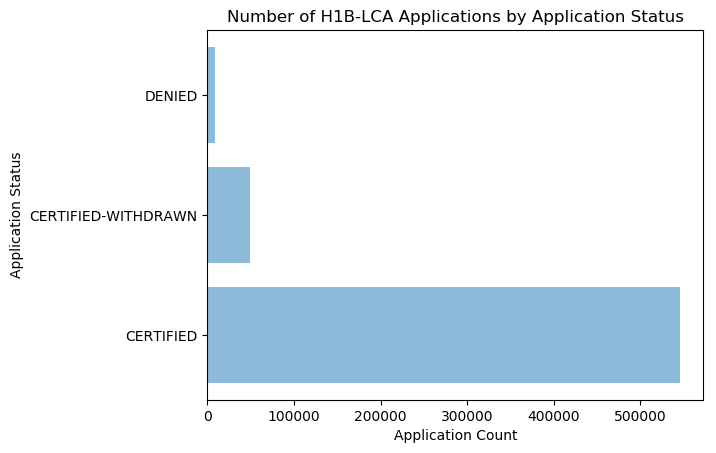

    Application Status   Count  Percentage of Total Applications
0            CERTIFIED  545694                         90.364941
1  CERTIFIED-WITHDRAWN   49704                          8.230802
2               DENIED    8480                          1.404257


In [99]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects=['CERTIFIED', 'CERTIFIED-WITHDRAWN', 'DENIED']
y_pos = np.arange(len(objects))
performance=df.groupby('CASE_STATUS').count()['CASE_SUBMITTED']



plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Application Count')
plt.ylabel('Application Status')
plt.title('Number of H1B-LCA Applications by Application Status')
 
plt.show()
d = {'Application Status': objects, 'Count': performance, 'Percentage of Total Applications': performance/sum(performance)*100}
application_status = pd.DataFrame(data=d)
application_status=application_status.reset_index(drop = True)

print(application_status)

Before understanding which values in certain fields contribute to application denial, it is important to understand the distribution for some fields that describe the employer who is submitting the H1B-LCA application.  The most defining feature or best descriptor of an employer is the employer name which is shown in the bar chart below by showcasing the top employers who submit applications.  

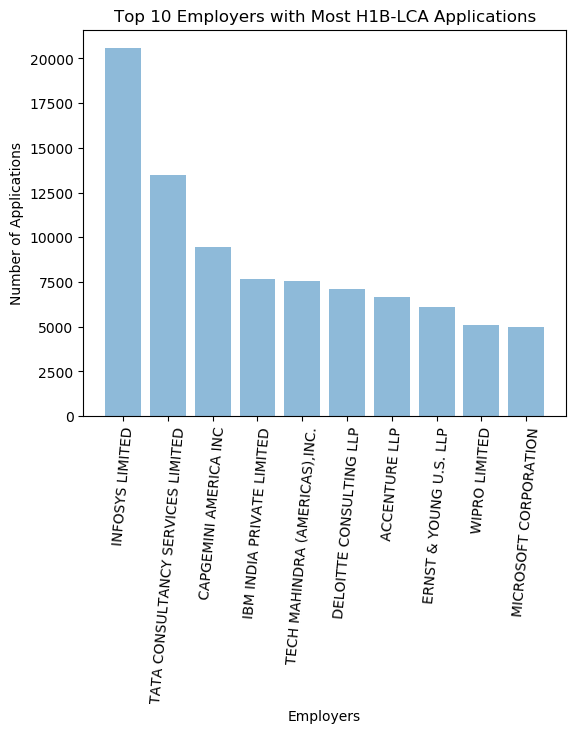

In [100]:
performance = df.groupby('EMPLOYER_NAME').count().sort_values(by='CASE_SUBMITTED', ascending=False)['CASE_SUBMITTED'].head(10)
objects = performance.index
y_pos = np.arange(len(objects))
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.xlabel('Employers')
plt.ylabel('Number of Applications')
plt.title('Top 10 Employers with Most H1B-LCA Applications')
plt.tight_layout()
plt.xticks(rotation=85)
plt.show()

It is seen by the bar graph of top ten employers that submit H1B-LCA applications, that the top employers submit many applications.  The top two employers, Infosys Limited and Tata Consultancy Services Limited submitted more than 20,000 and 12,500 applications respectively.  Each application can contain multiple employees that are being applied for.  Instead of applying for thousands of employees in a single application, these companies chose to submit thousands of individual applications.  It can be inferred that these companies have many hiring dates and position titles that they are hiring for so they need thousands of separate applications.  

Another defining feature of an employer is the worksite city which is shown in the bar chart below by showcasing the top worksite cities of employers who submit applications.  

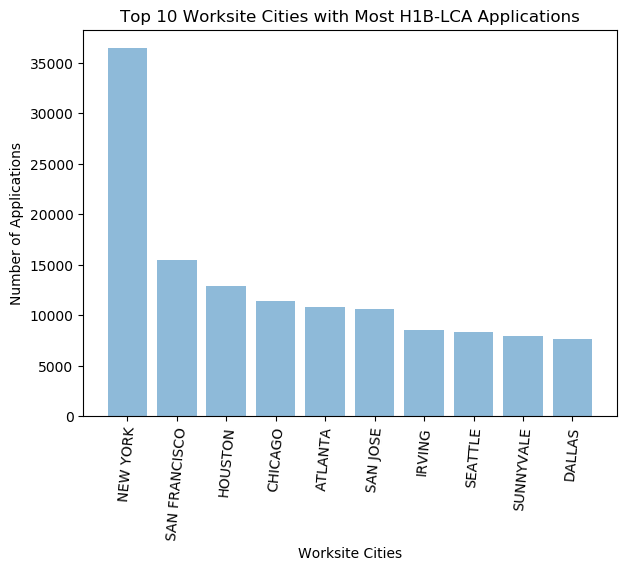

In [73]:
performance = df.groupby('WORKSITE_CITY').count().sort_values(by='CASE_SUBMITTED', ascending=False)['CASE_SUBMITTED'].head(10)
objects = performance.index
y_pos = np.arange(len(objects))
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.xlabel('Worksite Cities')
plt.ylabel('Number of Applications')
plt.title('Top 10 Worksite Cities with Most H1B-LCA Applications')
plt.tight_layout()
plt.xticks(rotation=85)
plt.show()

It is seen by the bar graph of top ten worksite cities of employers that submit H1B-LCA applications, that the top city, New York, submits many applications.  Companies in New York submitted more than 35,000 applications.  This application count is far greater than the number of applications in the second most common worksite city, San Francisco.  The difference in application count is more than 20,000.  The application count for the cities in between the second and tenth most common cities display a gradual decrease while the decrease between New York and San Francisco is very drastic.  

Another defining field that described an employer is the job title offered by the employer.  A bar chart is displayed below to showcase the top ten job titles that are being offered in H1B-LCA applications.  

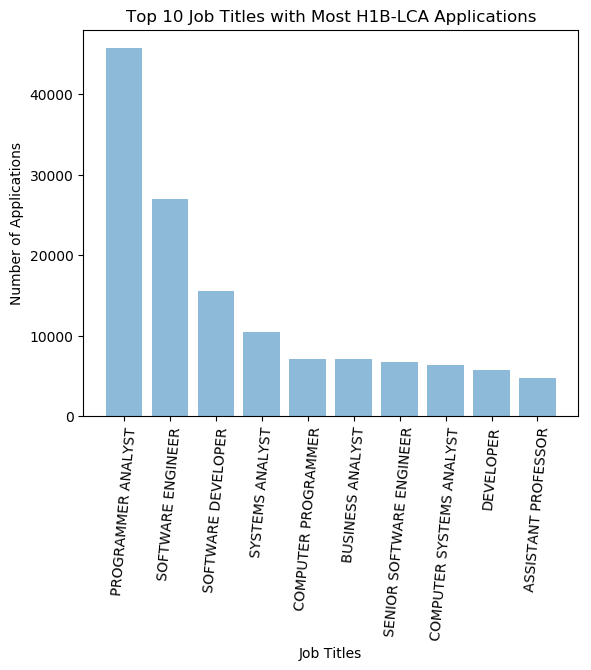

In [74]:
performance = df.groupby('JOB_TITLE').count().sort_values(by='CASE_SUBMITTED', ascending=False)['CASE_SUBMITTED'].head(10)
objects = performance.index
y_pos = np.arange(len(objects))
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.xlabel('Job Titles')
plt.ylabel('Number of Applications')
plt.title('Top 10 Job Titles with Most H1B-LCA Applications')
plt.tight_layout()
plt.xticks(rotation=85)
plt.show()

It is seen by the bar graph of top ten job titles offered by employers that submit H1B-LCA applications, that the top job title, programmer analyst, has the most submitted many applications with this title.  Companies offering the job title programer analyst submitted more than 45,000 applications.  This application count is far greater than the number of applications in the second most common job title, software engineer.  The difference between first and second place in application count is more than 10,000.  Out of the top ten job titles for H1B-LCA applications, eight of the titles are positions related to computer science.  It can be seen that majority of most common positions submitted are computer science related titles such as software developer, systems analyst, and computer programmer.  

Another defining field that described an employer is the industry in which the employer is in.  A bar chart is displayed below to showcase the top ten industries that are being offered in H1B-LCA applications.  

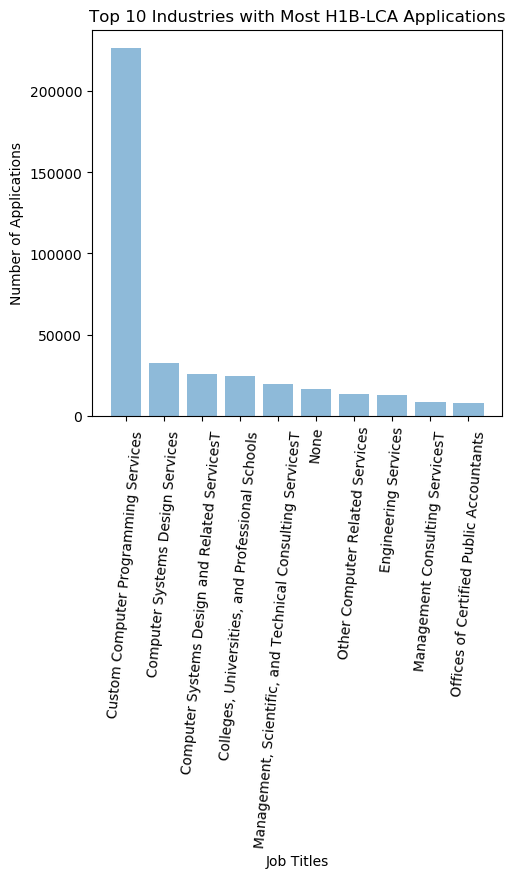

In [75]:
performance = df.groupby('NAICS_CODE').count().sort_values(by='CASE_SUBMITTED', ascending=False)['CASE_SUBMITTED'].head(10)
objects = performance.index
y_pos = np.arange(len(objects))
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.xlabel('Job Titles')
plt.ylabel('Number of Applications')
plt.title('Top 10 Industries with Most H1B-LCA Applications')
plt.tight_layout()
plt.xticks(rotation=85)
plt.show()

It is seen by the bar graph of top ten industries that submit H1B-LCA applications, that the top industry, custom computer programming services, submitted more than 200,000 applications.  Companies in computer programming services submitted more than a third of all applications.  This application count is far greater than the number of applications in the second most common indsutry, computer systems design services.  The difference in application count between the first and second most commong industry is more than 200,000.  The application count for the industries in between the second and tenth most common industries display a gradual decrease while the decrease between the top two indsutries is very abrupt.  

A reason for H1B-LCA application denial is the prevailing wage that is listed on the application.  It may may be an outlier or slightly incorrect.  The cell below produces a histogram of the prevailing wage distribution.  In order to produce a meaningful graph, the outlier values were not included in the x-axis range.  For example, if a point with a value of 4e8 is included, the bin size becomes very large and all of the points are concetrated into a few number of bins, creating a graph that does not display the distribution of non-outlier values.  

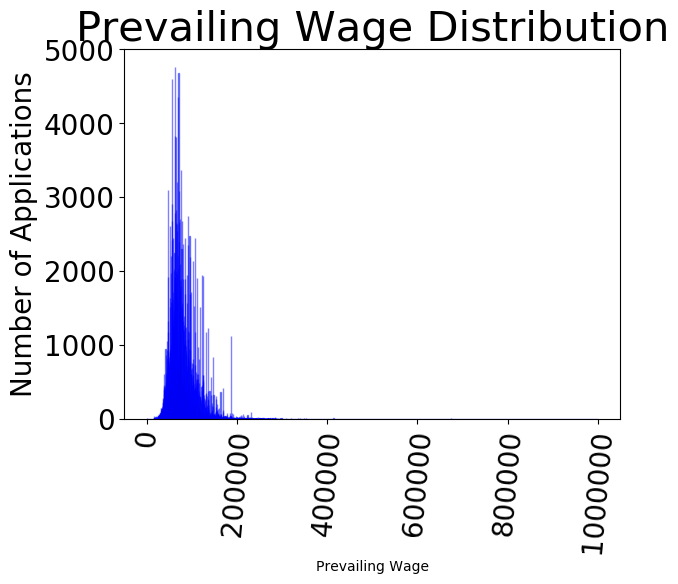

In [113]:
%store -r pw_year
bins = np.linspace(0, 1000000, 10000)
plt.title('Prevailing Wage Distribution',fontsize=30)
plt.xlabel('Prevailing Wage')
plt.ylabel('Number of Applications',fontsize=20)
plt.hist(pw_year, bins, alpha=0.5, histtype='bar', ec='blue')
plt.xticks(fontsize = 20, rotation=85) 
plt.yticks(fontsize = 20) 
plt.show() 

In [114]:
import statistics

mean_pw_year=(sum(pw_year) / len(pw_year))
print('The mean of the prevailing wage distribution that includes all the values is ' + str(round(mean_pw_year, 2)))

print('The standard deviation of the prevailing wage distrubtion that includes all the values is ' + str(round(statistics.stdev(pw_year), 2)))

non_outliers = [i for i in pw_year if i <= 10000000]
mean_non_outliers=(sum(non_outliers) / len(non_outliers))
print('The mean of the prevailing wage distribution that does not include outliers is ' + str(round(mean_non_outliers, 2)))

print('The standard deviation of the prevailing wage distribution that does not include outliers is ' + str(round(statistics.stdev(non_outliers), 2)))

The mean of the prevailing wage distribution that includes all the values is 94334.27
The standard deviation of the prevailing wage distrubtion that includes all the values is 1621555.0
The mean of the prevailing wage distribution that does not include outliers is 77325.03
The standard deviation of the prevailing wage distribution that does not include outliers is 30522.09


The mean of the prevailing wage distribution is 94,334.27.  This value includes all of the values including outliers that are above 100,000,000.  Outliers skew the mean and standard deviation of the prevailing wage distribution.  The difference in mean when outliers are removed from the prevailing wage distribution is 17,009.24.  Similarly, the standard deviation is decreased by a factor of 5.31 from 1,621,555 to 30,522.09.  

Another reason for H1B-LCA application denial is the wage offered by the employer that is listed on the application.  The cell below produces a histogram of the wage offered distribution.  In order to produce a meaningful graph, the outlier values were not included in the x-axis range.  For example, if a point with a value greater than 1e8 is included, the bin size becomes very large and all of the points are concetrated into a few number of bins, creating a graph that does not display the distribution of non-outlier values.  

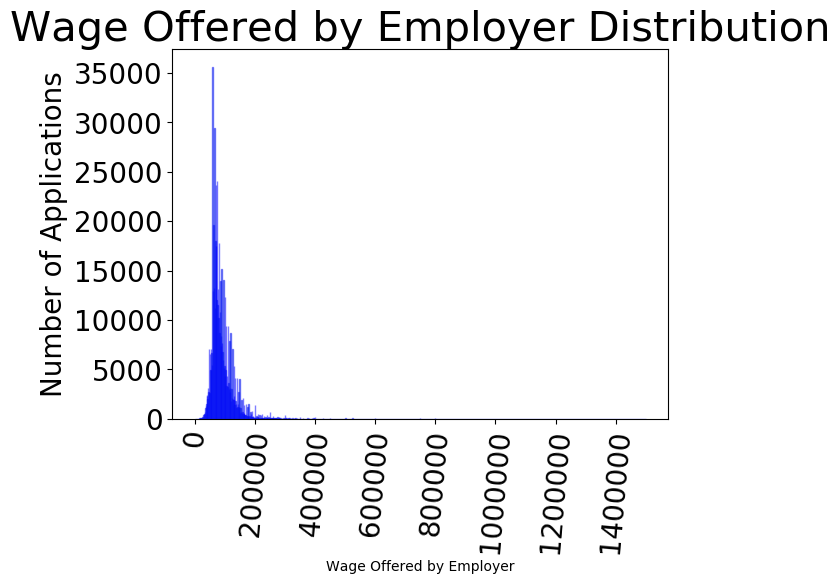

In [115]:
%store -r wage_year
bins = np.linspace(0, 1500000, 1000)
plt.title('Wage Offered by Employer Distribution',fontsize=30)
plt.xlabel('Wage Offered by Employer')
plt.ylabel('Number of Applications',fontsize=20)
plt.hist(wage_year, bins, alpha=0.5, histtype='bar', ec='blue')
plt.xticks(fontsize = 20, rotation=85) 
plt.yticks(fontsize = 20) 
plt.show() 

In [116]:
mean_wage_year=(sum(wage_year) / len(wage_year))
print('The mean of the wage offered distribution that includes all the values is ' + str(round(mean_wage_year, 2)))

print('The standard deviation of the wage offered distrubtion that includes all the values is ' + str(round(statistics.stdev(wage_year), 2)))

non_outliers = [i for i in wage_year if i <= 100000000]
mean_non_outliers=(sum(non_outliers) / len(non_outliers))
print('The mean of the wage offered distribution that does not include outliers is ' + str(round(mean_non_outliers, 2)))

print('The standard deviation of the wage offered distribution that does not include outliers is ' + str(round(statistics.stdev(non_outliers), 2)))

The mean of the wage offered distribution that includes all the values is 92688.89
The standard deviation of the wage offered distrubtion that includes all the values is 939397.3
The mean of the wage offered distribution that does not include outliers is 87719.92
The standard deviation of the wage offered distribution that does not include outliers is 38632.41


The mean of the wage offered distribution is 92,688.89.  This value includes all of the values including outliers that are above 100,000,000.  Outliers skew the mean and standard deviation of the wage offered distribution.  The difference in mean between the prevailing wage distribution and the wage offered by the employer is 1,645.38. The prevailing wage is higher on average than the wage offered by the employer.  The lower wage offered may be a reason for application denial.   Similarly, the difference in mean between prevailing wage and wage offered for non outlier values increased  by 10,367.89 from 77325.03 to 87719.92. The increase in mean from when outliers were removed means that the prevailing wage distribution had outliers with a higher total value than the wage offered distribution.   

The cell below constructs a scatter plot describing the relationship between annual wage offered by the employer and the annual prevailing wage.  It can be seen in the scatter plot that there are quite a few outliers in both axis as there are wages offerd greater than 1e8 and prevailing wages greater than 0.5e8.  

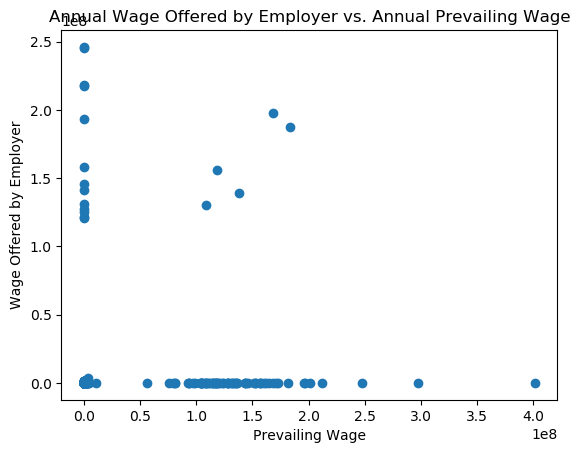

In [117]:
from matplotlib import rcParams
x=pw_year
y=wage_year
plt.scatter(x, y)
plt.title("Annual Wage Offered by Employer vs. Annual Prevailing Wage")
plt.xlabel("Prevailing Wage")
plt.ylabel("Wage Offered by Employer")

rcParams['axes.titlepad'] = 40 

plt.show()

Wage difference or the difference between wage offered and prevailing wage is a possible reason for H1B-LCA application denial.  This means that the employer is giving an unreasonable wage or that the prevailing wage is out of range or not appropriate for the specified job title.

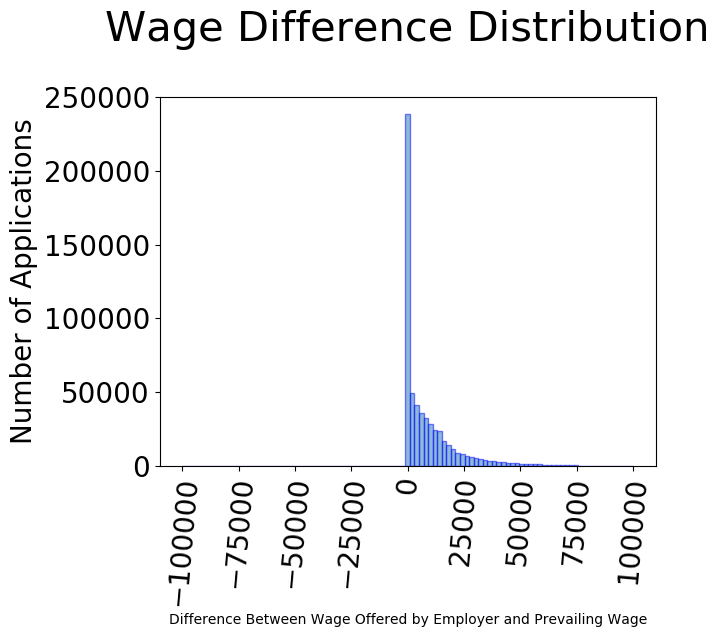

In [118]:
wage_difference=df[np.isfinite(df['WAGE_DIFFERENCE'])]['WAGE_DIFFERENCE'].tolist()
bins = np.linspace(-100000, 100000, 100)
plt.title('Wage Difference Distribution',fontsize=30)
plt.xlabel('Difference Between Wage Offered by Employer and Prevailing Wage')
plt.ylabel('Number of Applications',fontsize=20)
plt.hist(wage_difference, bins, alpha=0.5, histtype='bar', ec='blue')
plt.xticks(fontsize = 20, rotation=85) 
plt.yticks(fontsize = 20) 
plt.show() 

The bin size is 2,000 in the above bar chart.  A large portion of the total applications have a wage difference that is greater than less than or equal to 2,000 dollars.  The outlier values were not shown so that a distribution would be visible in the graph.  

Now that various fields have been explored, and we have gained insights into how the data is distributed for fields that describe the employer, we can explore the effect of values in certain fields on the outcome of the application, whether it was certified or denied.

A field called rejected_bool is created below in order to turn the categorial variables of the field CASE_STATUS into a dummy variable 1 or 0.  Denied applications recieved a value of one while accepted applications recieved a value of zero.   

In [110]:
df['rejected_bool'] = np.where(df.CASE_STATUS == 'DENIED', 1, 0)

The two lists for prevailing wage of accepted applications and denied applications are created below.

In [111]:
pw_wage_denied=df[df['rejected_bool']==1]
pw_wage_denied=pw_wage_denied['PREVAILING_WAGE'].tolist()

pw_wage_acc=df[df['rejected_bool']==0]
pw_wage_acc=pw_wage_acc['PREVAILING_WAGE'].tolist()


The lists for prevailing wage of accepted applications and denied applications are used below to create two histograms of the distribution of prevailing wage for the accepted and denied applications.

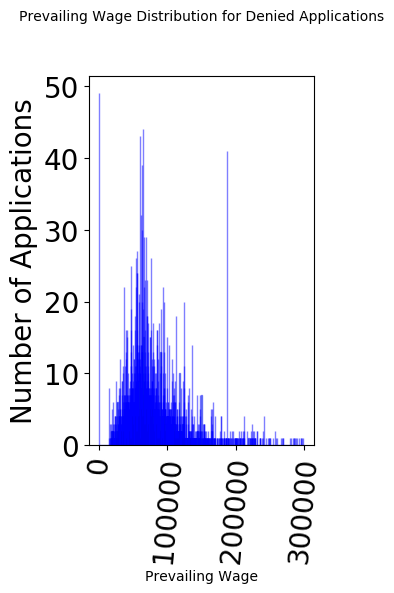

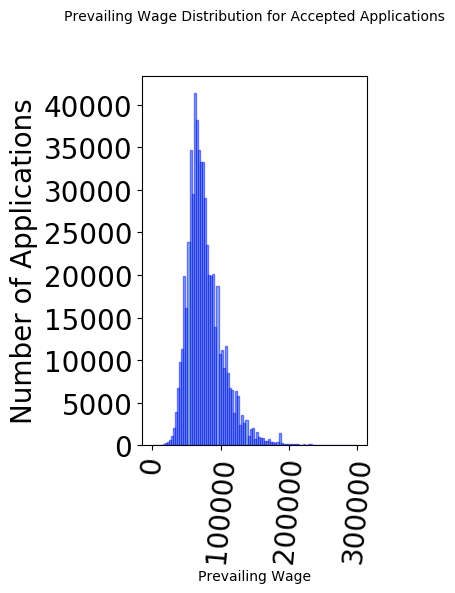

In [119]:

bins = np.linspace(0, 300000, 10000)
plt.subplot(1,2,1)
plt.title('Prevailing Wage Distribution for Denied Applications',fontsize=10)
plt.xlabel('Prevailing Wage')
plt.ylabel('Number of Applications',fontsize=20)
plt.hist(pw_wage_denied, bins, alpha=0.5, histtype='bar', ec='blue')
plt.xticks(fontsize = 20, rotation=85) 
plt.yticks(fontsize = 20)
plt.show()

bins = np.linspace(0, 300000, 100)
plt.subplot(1,2,2)
plt.title('Prevailing Wage Distribution for Accepted Applications',fontsize=10)
plt.xlabel('Prevailing Wage')
plt.ylabel('Number of Applications',fontsize=20)
plt.hist(pw_wage_acc, bins, alpha=0.5, histtype='bar', ec='blue')
plt.xticks(fontsize = 20, rotation=85) 
plt.yticks(fontsize = 20)
plt.show()

In [85]:
pw_wage_denied_mean=(sum(pw_wage_denied) / len(pw_wage_denied))
print('The mean of the prevailing wage distribution that includes all the denied applications is ' + str(round(pw_wage_denied_mean, 2)))

pw_wage_acc_mean=(sum(pw_wage_acc) / len(pw_wage_acc))
print('The mean of the prevailing distribution that includes all the certified applications is ' + str(round(pw_wage_acc_mean, 2)))



The mean of the prevailing wage distribution that includes all the denied applications is 1291764.47
The mean of the prevailing distribution that includes all the certified applications is 77273.21


The difference in the average prevailing wage for denied and certified applications is telling and can serve as a signature for the denied applications.  If an application has a higher prevailing wage we can assign a higher probability that it will be denied.  

Density plots representing the distribution of prevailing wage for accepted and denied applications are displayed below.  As seen by the denisty plot for the prevailing wage of denied applications, most of the applications have a prevailing wage listed at 0.5e8 or greater while the accepted applications are contained in a range from 0 to 200,000 for almost all the values.  

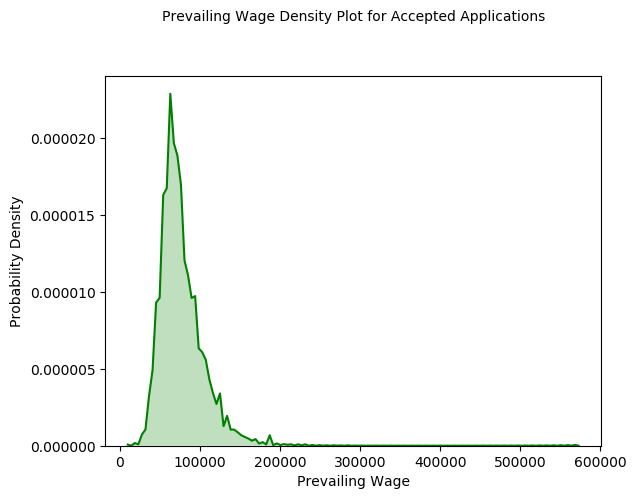

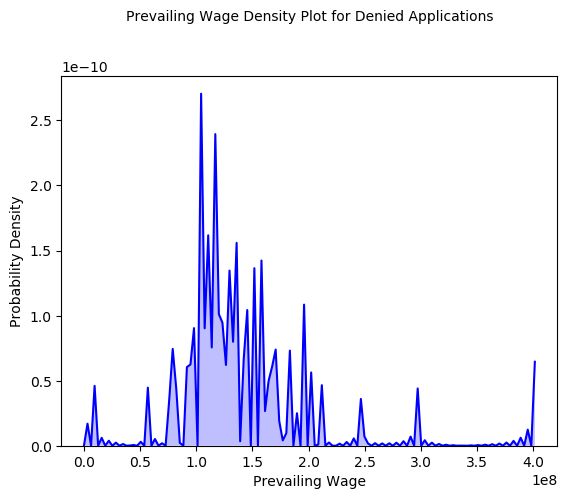

In [120]:
import seaborn as sns

x=pw_wage_acc
y=pw_wage_denied

sns.kdeplot(x, color="green", shade=True)
plt.title('Prevailing Wage Density Plot for Accepted Applications',fontsize=10)
plt.xlabel('Prevailing Wage')
plt.ylabel('Probability Density')
plt.show()
sns.kdeplot(y, color="blue", shade=True)
plt.title('Prevailing Wage Density Plot for Denied Applications',fontsize=10)
plt.xlabel('Prevailing Wage')
plt.ylabel('Probability Density')
plt.show()

In [121]:
#Note

j2 = [i for i in y if i <1e5]
len(j2)

6893

Density plots representing the distribution of difference in wage offered and prevailing wage for accepted and denied applications are displayed below.  As seen by the denisty plot for the wage difference of denied applications, most of the applications have a wage difference listed in the range between -0.5e8 to +0.5e8 while many of the accepted applications are contained in a range from 1e8 to 2.5e8.  

It can be inferred from the probability distributions that higher wage difference means the application was probably accepted while a lower wage difference means the application was rejected. 

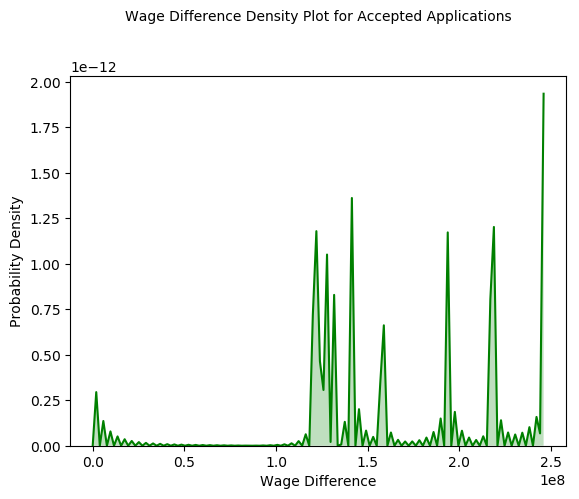

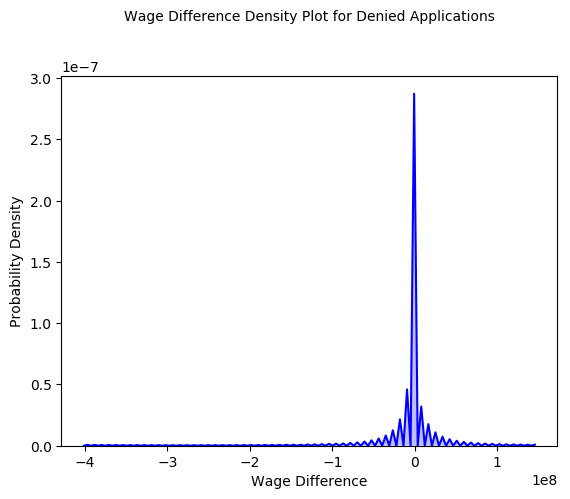

In [122]:
import numbers

wage_diff_denied=df[df['rejected_bool']==1]
wage_diff_denied=wage_diff_denied['WAGE_DIFFERENCE'].tolist()
wage_diff_denied = [num for num in wage_diff_denied if isinstance(num, (int,float))]

wage_diff_acc=df[df['rejected_bool']==0]
wage_diff_acc=wage_diff_acc['WAGE_DIFFERENCE'].tolist()
wage_diff_acc = [num for num in wage_diff_acc if isinstance(num, (int,float))]


x=wage_diff_acc
y=wage_diff_denied

sns.kdeplot(x, color="green", shade=True)
plt.title('Wage Difference Density Plot for Accepted Applications',fontsize=10)
plt.xlabel('Wage Difference')
plt.ylabel('Probability Density')
plt.show()
sns.kdeplot(y, color="blue", shade=True)
plt.title('Wage Difference Density Plot for Denied Applications',fontsize=10)
plt.xlabel('Wage Difference')
plt.ylabel('Probability Density')
plt.show()

In the four bar charts below, four fields are tested to see if they have their values are common for denied applicants.  For example in the first graph, H1B_DEPENDENT field is examined.  H1-B dependent means that at least 15% of an employer's workforce is consisted of H1B workers.  Of the applicants that answered No or N to this field, 1.7% were denied.  This percentage is very small and does not tell us much about whether this fields affects rejection.  On the flip side, 98.3% of the applicants that answered No or N were accepted.  If the percentage was closer to 100% for the people who answered No and were denied, we could state that answering No leads to a high chance of rejection.


None of the four fields resulted in a substanstive relationship between answering a certain way that could lead to rejection.  None of the percentages of the values for the rejected applicants were larger than two percent.  This means a minimum of 98% of the applicants who registered the same value on the application were also accepted. 

H1B_DEPENDENT
N       0.017213
None    0.065495
Y       0.005979
Name: rejected_bool, dtype: float64
Index(['N', 'None', 'Y'], dtype='object', name='H1B_DEPENDENT')
[0 1 2]


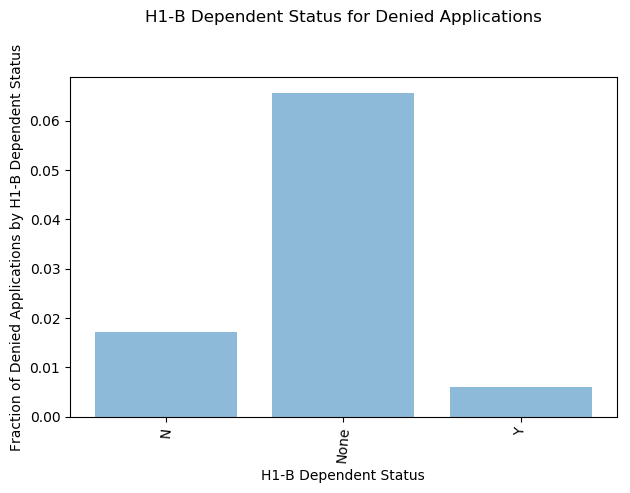

In [91]:
performance = df.groupby('H1B_DEPENDENT').agg({'rejected_bool':'mean'})['rejected_bool']
print(performance)
objects = performance.index
print(objects)
y_pos = np.arange(len(objects))
print(y_pos)
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.xlabel('H1-B Dependent Status')
plt.ylabel('Fraction of H1-B Dependent Status for Denied Applications')
plt.title('H1-B Dependent Status for Denied Applications')
plt.tight_layout()
plt.xticks(rotation=85)
plt.show()





WILLFUL_VIOLATOR
N       0.012864
None    0.065480
Y       0.037281
Name: rejected_bool, dtype: float64
Index(['N', 'None', 'Y'], dtype='object', name='WILLFUL_VIOLATOR')
[0 1 2]


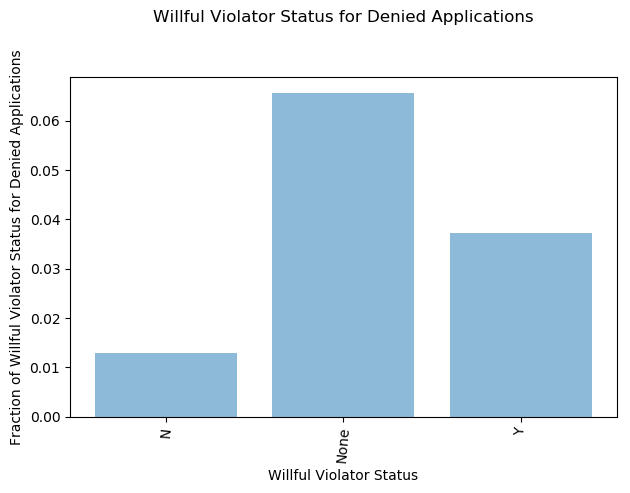

In [92]:
performance = df.groupby('WILLFUL_VIOLATOR').agg({'rejected_bool':'mean'})['rejected_bool']
print(performance)
objects = performance.index
print(objects)
y_pos = np.arange(len(objects))
print(y_pos)
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.xlabel('Willful Violator Status')
plt.ylabel('Fraction of Willful Violator Status for Denied Applications')
plt.title('Willful Violator Status for Denied Applications')
plt.tight_layout()
plt.xticks(rotation=85)
plt.show()



SUPPORT_H1B
N       0.018721
None    0.018727
Y       0.006185
Name: rejected_bool, dtype: float64
Index(['N', 'None', 'Y'], dtype='object', name='SUPPORT_H1B')
[0 1 2]


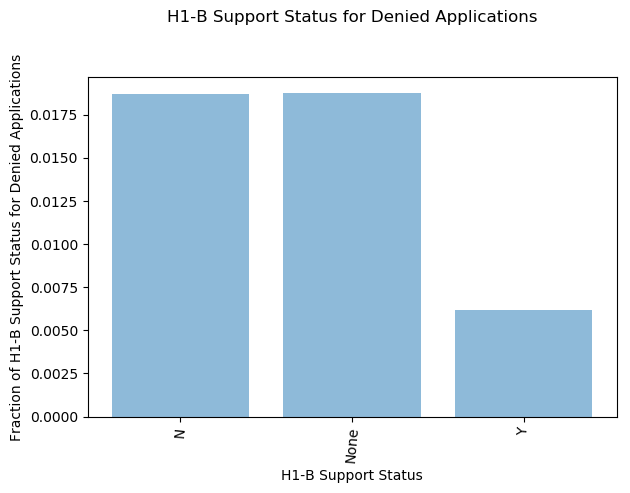

In [95]:
performance = df.groupby('SUPPORT_H1B').agg({'rejected_bool':'mean'})['rejected_bool']
print(performance)
objects = performance.index
print(objects)
y_pos = np.arange(len(objects))
print(y_pos)
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.xlabel('H1-B Support Status')
plt.ylabel('Fraction of H1-B Support Status for Denied Applications')
plt.title('H1-B Support Status for Denied Applications')
plt.tight_layout()
plt.xticks(rotation=85)
plt.show()


LABOR_CON_AGREE
N       0.007254
None    0.011081
Y       0.019223
Name: rejected_bool, dtype: float64
Index(['N', 'None', 'Y'], dtype='object', name='LABOR_CON_AGREE')
[0 1 2]


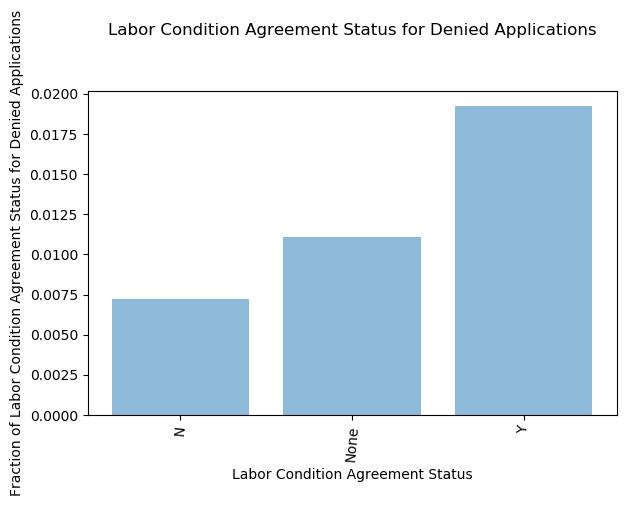

In [96]:
performance = df.groupby('LABOR_CON_AGREE').agg({'rejected_bool':'mean'})['rejected_bool']
print(performance)
objects = performance.index
print(objects)
y_pos = np.arange(len(objects))
print(y_pos)
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.xlabel('Labor Condition Agreement Status')
plt.ylabel('Fraction of Labor Condition Agreement Status for Denied Applications')
plt.title('Labor Condition Agreement Status for Denied Applications')
plt.tight_layout()
plt.xticks(rotation=85)
plt.show()


We need to create a diagnostic indicator for key fields that can displays a likelihood of an application getting rejected if a certain value is in field.  Based on the EDA completed in this notebook, key fields include prevailing wage, wage offered, and wage difference.  These fields have a different in distribution of values for accepted vs. denied applications.  

In [ ]:
#Need to check prevailing wage vs. prevailing wage in database
